In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/rend_2016a2022_modificadoxls.xlsx',sheet_name="REND",skiprows=0)

In [ ]:
datos.dtypes

Idalumno          int64
Cod.Asign         int64
Asignatura       object
Cod.Car.Sec      object
Semestre          int64
Convocatoria      int64
Anho              int64
Ciclo             int64
Aprobado          int64
Firma.Anho        int64
1P                int64
2P                int64
3P                int64
4P              float64
4P_60           float64
T                 int64
Asistencia        int64
Requisito         int64
1R                int64
2R                int64
Nota.Final       object
periodo1         object
periodo2         object
periodo3         object
P1F             float64
P2F             float64
P3F             float64
dtype: object

## guardo los datos de la materia en un array

In [ ]:
c2 = datos[datos['Asignatura'] == 'CALCULO 2']
c2=c2[c2.Anho!=2020]
c2.head()

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,Requisito,1R,2R,Nota.Final,periodo1,periodo2,periodo3,P1F,P2F,P3F
84,19,13008,CALCULO 2,MCT-PLS13,2,1,2019,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,29,13008,CALCULO 2,ELE-PLS13,2,1,2016,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,29,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,29,13008,CALCULO 2,ELE-PLS13,2,2,2019,2,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,29,13008,CALCULO 2,ELE-PLS13,2,1,2022,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Agrego las columnas que creo necesarias
- Las primeras 7 para indicar de que carrera es el estudiante
- 'Cant.Materias' nos dice la cantidad de materias que el alumno esta cursando al mismo tiempo
- 'Recursante' nos indica si el alumno es o no recursante
- 'Cant. C1' cuenta la cantidad de veces que el alumno cursó c1 antes del curso actual
- 'Abandono' es el indicativo de que el alumno degeneró la materia

In [ ]:
c2.loc[:,'CGF'] = 0
c2.loc[:,'CIV'] = 0
c2.loc[:,'IND'] = 0
c2.loc[:,'MEC'] = 0
c2.loc[:,'ELE'] = 0
c2.loc[:,'MCT'] = 0
c2.loc[:,'ECA'] = 0
c2.loc[:,'Cant.Materias'] = 0
c2.loc[:,'Recursante'] = 0
c2.loc[:,'Cant. C1'] = 0
c2.loc[:,'Abandono'] = 0


c2.columns

Index(['Idalumno', 'Cod.Asign', 'Asignatura', 'Cod.Car.Sec', 'Semestre',
       'Convocatoria', 'Anho', 'Ciclo', 'Aprobado', 'Firma.Anho', '1P', '2P',
       '3P', '4P', '4P_60', 'T', 'Asistencia', 'Requisito', '1R', '2R',
       'Nota.Final', 'periodo1', 'periodo2', 'periodo3', 'P1F', 'P2F', 'P3F',
       'CGF', 'CIV', 'IND', 'MEC', 'ELE', 'MCT', 'ECA', 'Cant.Materias',
       'Recursante', 'Cant. C1', 'Abandono'],
      dtype='object')

Quiero introducir a mis datos:
- La carrera a la que está inscrito
- La cantidad de materias que el alumno esta cursando en ese semestre
- La cantidad de veces que ese alumno cursó, o esta cursando C1
- Si es o no recursante

In [ ]:
for i in c2.index:
  if ('CGF' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'CGF']=1
  elif ('CIV' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'CIV']=1
  elif ('IND' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'IND']=1
  elif ('MEC' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'MEC']=1
  elif ('ELE' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'ELE']=1
  elif ('MCT' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'MCT']=1
  elif ('MEC' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'MEC']=1
  elif ('ECA' in c2.loc[i,'Cod.Car.Sec']):
    c2.loc[i,'ECA']=1
  for j in datos.loc[datos['Idalumno'] == c2.loc[i,'Idalumno']].index:
    if c2.loc[i,'Anho'] == datos.loc[j,'Anho'] and c2.loc[i,'Ciclo'] == datos.loc[j,'Ciclo']:
      c2.loc[i,'Cant.Materias'] += 1
    if datos.loc[j,'Asignatura'] == 'CALCULO 1':
      c2.loc[i,'Cant. C1'] +=1
  if c2.loc[i,'Firma.Anho']!=0:
    c2.loc[i,'Recursante'] = 1

## hago mi primer filtrado
1. no quiero datos del 2020, porque ahi hay 4 parciales y se complica
2. veo quienes no tienen nota final, ya que esto significa que abandonaron
3. creo que los que tienen menos de 15 puntos en el primer parcial son mas propensos a degenerar
4. Los que degeneran ya van a hacer eso antes del segundo parcial, por lo que puedo dejar solo los datos que tengan 0 en el segundo parcial
5. Los que tengan menos de 3 en taller

In [ ]:
c2_filtro1 = c2[c2['Nota.Final'].isna()]
c2_filtro1 = c2_filtro1[c2_filtro1['1P']<15]
c2_filtro1 = c2_filtro1[c2_filtro1['2P'] == 0]
c2_filtro1 = c2_filtro1[c2_filtro1['T'] < 5]

c2_filtro1

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,CIV,IND,MEC,ELE,MCT,ECA,Cant.Materias,Recursante,Cant. C1,Abandono
84,19,13008,CALCULO 2,MCT-PLS13,2,1,2019,1,0,0,...,0,0,0,0,1,0,5,0,0,0
268,29,13008,CALCULO 2,ELE-PLS13,2,1,2016,1,0,0,...,0,0,0,1,0,0,3,0,0,0
272,29,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,0,0,...,0,0,0,1,0,0,5,0,0,0
280,29,13008,CALCULO 2,ELE-PLS13,2,2,2019,2,0,0,...,0,0,0,1,0,0,4,0,0,0
284,29,13008,CALCULO 2,ELE-PLS13,2,1,2022,1,0,0,...,0,0,0,1,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173795,4416,13008,CALCULO 2,CIV-PLS13,2,1,2021,1,0,2020,...,1,0,0,0,0,0,3,1,2,0
173798,4416,13008,CALCULO 2,CIV-PLS13,2,2,2021,2,0,0,...,1,0,0,0,0,0,5,0,2,0
173803,4416,13008,CALCULO 2,CIV-PLS13,2,1,2022,1,0,0,...,1,0,0,0,0,0,4,0,2,0
175426,4481,13008,CALCULO 2,MCT-PLS13,2,1,2016,1,0,0,...,0,0,0,0,1,0,4,0,0,0


visualizo los datos de los alumnos que creo que van a abandonar la materia, buscando encontrar patrones.

Text(0, 0.5, 'Cantidad de alumnos')

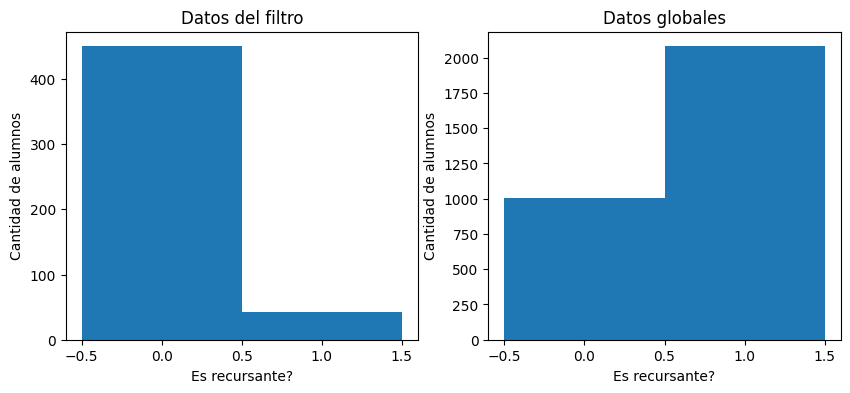

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bins1 = np.arange(c2_filtro1['Recursante'].min() - 0.5, c2_filtro1['Recursante'].max() + 1.5, 1)
bins2 = np.arange(c2['Recursante'].min() - 0.5, c2['Recursante'].max() + 1.5, 1)

axs[0].hist(c2_filtro1.loc[:,'Recursante'],bins=bins2)
axs[0].set_title('Datos del filtro')
axs[0].set_xlabel('Es recursante?')
axs[0].set_ylabel('Cantidad de alumnos')

axs[1].hist(c2.loc[:,'Recursante'],bins=bins2)
axs[1].set_title('Datos globales')
axs[1].set_xlabel('Es recursante?')
axs[1].set_ylabel('Cantidad de alumnos')

Text(0, 0.5, 'Cantidad de alumnos')

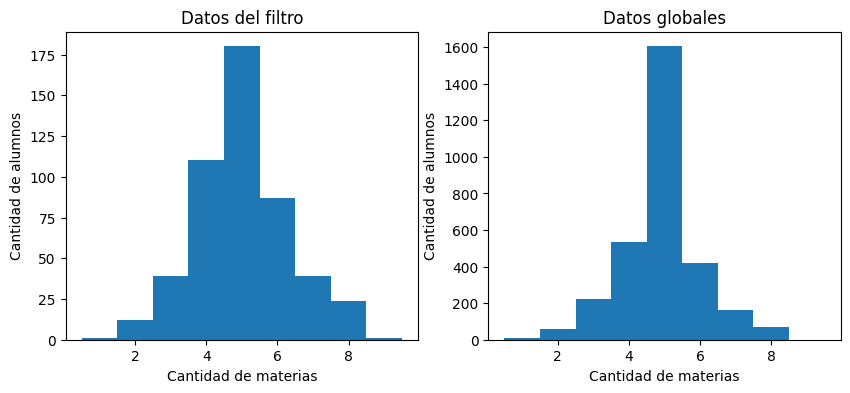

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bins1 = np.arange(c2_filtro1['Cant.Materias'].min() - 0.5, c2_filtro1['Cant.Materias'].max() + 1.5, 1)
bins2 = np.arange(c2['Cant.Materias'].min() - 0.5, c2['Cant.Materias'].max() + 1.5, 1)

axs[0].hist(c2_filtro1.loc[:,'Cant.Materias'],bins=bins1)
axs[0].set_title('Datos del filtro')
axs[0].set_xlabel('Cantidad de materias')
axs[0].set_ylabel('Cantidad de alumnos')

axs[1].hist(c2.loc[:,'Cant.Materias'],bins=bins2)
axs[1].set_title('Datos globales')
axs[1].set_xlabel('Cantidad de materias')
axs[1].set_ylabel('Cantidad de alumnos')

Text(0, 0.5, 'Cantidad de alumnos')

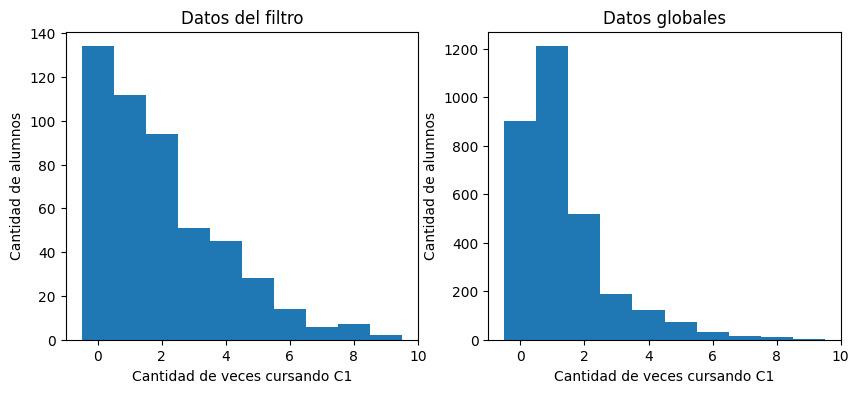

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bins1 = np.arange(c2_filtro1['Cant. C1'].min() - 0.5, c2_filtro1['Cant. C1'].max() + 1.5, 1)
bins2 = np.arange(c2['Cant. C1'].min() - 0.5, c2['Cant. C1'].max() + 1.5, 1)

axs[0].hist(c2_filtro1.loc[:,'Cant. C1'],bins=bins1)
axs[0].set_title('Datos del filtro')
axs[0].set_xlabel('Cantidad de veces cursando C1')
axs[0].set_ylabel('Cantidad de alumnos')

axs[1].hist(c2.loc[:,'Cant. C1'],bins=bins2)
axs[1].set_title('Datos globales')
axs[1].set_xlabel('Cantidad de veces cursando C1')
axs[1].set_ylabel('Cantidad de alumnos')

Text(0, 0.5, 'Cantidad de alumnos')

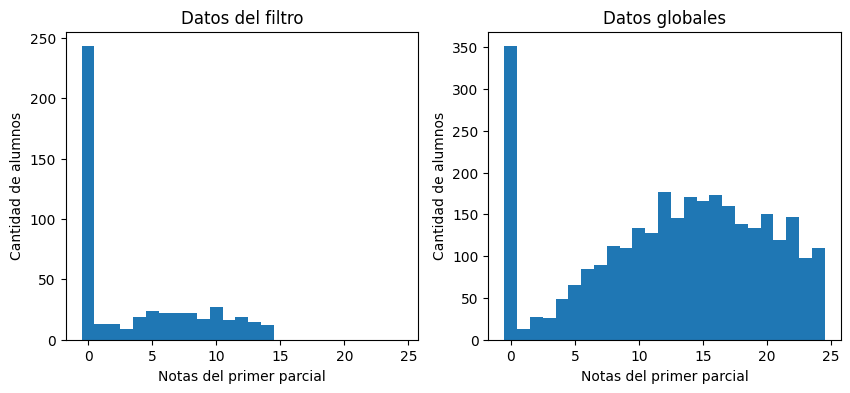

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bins1 = np.arange(c2_filtro1['1P'].min() - 0.5, c2_filtro1['1P'].max() + 1.5, 1)
bins2 = np.arange(c2['1P'].min() - 0.5, c2['1P'].max() + 1.5, 1)

axs[0].hist(c2_filtro1.loc[:,'1P'],bins=bins2)
axs[0].set_title('Datos del filtro')
axs[0].set_xlabel('Notas del primer parcial')
axs[0].set_ylabel('Cantidad de alumnos')

axs[1].hist(c2.loc[:,'1P'],bins=bins2)
axs[1].set_title('Datos globales')
axs[1].set_xlabel('Notas del primer parcial')
axs[1].set_ylabel('Cantidad de alumnos')

Text(0, 0.5, 'Cantidad de alumnos')

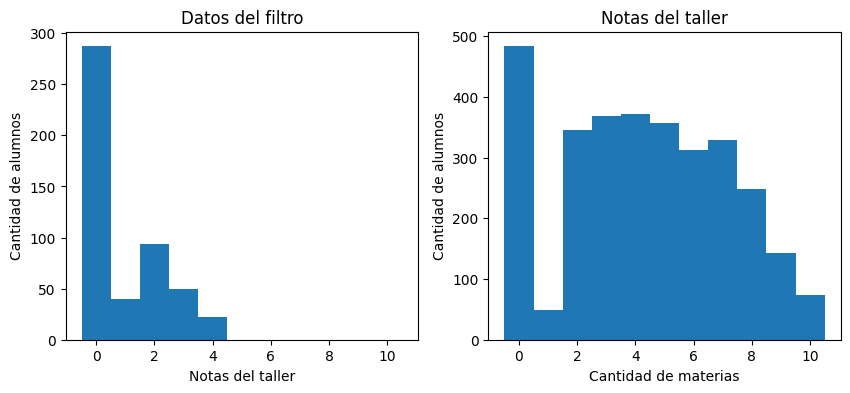

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
bins1 = np.arange(c2_filtro1['T'].min() - 0.5, c2_filtro1['T'].max() + 1.5, 1)
bins2 = np.arange(c2['T'].min() - 0.5, c2['T'].max() + 1.5, 1)

axs[0].hist(c2_filtro1.loc[:,'T'],bins=bins2)
axs[0].set_title('Datos del filtro')
axs[0].set_xlabel('Notas del taller')
axs[0].set_ylabel('Cantidad de alumnos')

axs[1].hist(c2.loc[:,'T'],bins=bins2)
axs[1].set_title('Notas del taller')
axs[1].set_xlabel('Cantidad de materias')
axs[1].set_ylabel('Cantidad de alumnos')

## Creo el dataset que voy a usar
yo quiero tener un dataset de todos los cursantes de la materia, pero con el filtrado que hice identifique a los que yo creo que degeneran.
Entonces mi dataset tiene que tener una columna extra que diga si yo pienso que degeneraron o no

In [ ]:
indices_filtrados = c2[c2['Idalumno'].isin(c2_filtro1['Idalumno'])].index
c2.loc[indices_filtrados, 'Abandono'] = 1

In [ ]:
c2_dataset = c2[['Anho','1P','T','Asistencia','Cod.Car.Sec','Cant.Materias','Recursante','Cant. C1','CGF','CIV','IND','MEC','ELE','MCT','ECA','Abandono']]
c2_dataset

,Anho,1P,T,Asistencia,Cod.Car.Sec,Cant.Materias,Recursante,Cant. C1,CGF,CIV,IND,MEC,ELE,MCT,ECA,Abandono
84,2019,0,0,1,MCT-PLS13,5,0,0,0,0,0,0,0,1,0,1
268,2016,5,3,1,ELE-PLS13,3,0,0,0,0,0,0,1,0,0,1
272,2017,7,2,0,ELE-PLS13,5,0,0,0,0,0,0,1,0,0,1
280,2019,0,0,1,ELE-PLS13,4,0,0,0,0,0,0,1,0,0,1
284,2022,0,0,1,ELE-PLS13,3,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175127,2022,14,3,1,CIV-PLS13,5,1,3,0,1,0,0,0,0,0,0
175284,2021,15,3,1,IND-PLS13,6,0,2,0,0,1,0,0,0,0,0
175290,2022,14,6,1,IND-PLS13,6,1,2,0,0,1,0,0,0,0,0
175426,2016,0,0,0,MCT-PLS13,4,0,0,0,0,0,0,0,1,0,1


Como hay algunos alumnos que tienen cero en cantidad de veces cursando c1, probablemente debido a una falta de datos.
Voy a rellenar todos esos casos con el caso minimo, que hayan cursado 1 vez

In [ ]:
for i in c2_dataset.index:
  if c2_dataset.loc[i,'Cant. C1'] == 0:
    c2_dataset.loc[i,'Cant. C1'] = 1

c2_dataset

,Anho,1P,T,Asistencia,Cod.Car.Sec,Cant.Materias,Recursante,Cant. C1,CGF,CIV,IND,MEC,ELE,MCT,ECA,Abandono
84,2019,0,0,1,MCT-PLS13,5,0,1,0,0,0,0,0,1,0,1
268,2016,5,3,1,ELE-PLS13,3,0,1,0,0,0,0,1,0,0,1
272,2017,7,2,0,ELE-PLS13,5,0,1,0,0,0,0,1,0,0,1
280,2019,0,0,1,ELE-PLS13,4,0,1,0,0,0,0,1,0,0,1
284,2022,0,0,1,ELE-PLS13,3,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175127,2022,14,3,1,CIV-PLS13,5,1,3,0,1,0,0,0,0,0,0
175284,2021,15,3,1,IND-PLS13,6,0,2,0,0,1,0,0,0,0,0
175290,2022,14,6,1,IND-PLS13,6,1,2,0,0,1,0,0,0,0,0
175426,2016,0,0,0,MCT-PLS13,4,0,1,0,0,0,0,0,1,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
ruta_archivo = '/content/drive/My Drive/c2_dataset.csv'
c2_dataset.to_csv(ruta_archivo, index=False)

Mounted at /content/drive
